## Titanic Dataset

### Introduction

We will be going through whole process of creating a machine learning model on the famous Titanic dataset,which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. In this challenge, you will predict whether a passenger on the titanic would have been survived or not.

### About Titanic

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

### About the Dataset

We have data of all passengers and the problem statement is to predict the survival  of a passenger given his/her current data inputs. The complete data can be downloaded here - www.kaggle.com/c/titanic/data

#### Importing required libraries

In [1]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
# It sets the backend of matplotlib to the 'inline' backend
%matplotlib inline 
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Algorithms
from sklearn.linear_model import LogisticRegression

Let us now load the dataset.

'read_csv' function reads a comma-separated values (csv) file into DataFrame.

In [2]:
# Reading train data from csv file
train = pd.read_csv(r'E:\SupervisedLearning\Practice Datasets\titanic\train.csv')


In [3]:
# Preview of train data in a dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Class task

 Renaming header columns with prefix "t_" . Ex: PassengerId as "t_PassengerId".

In [4]:
# Reading test data from csv file
test = pd.read_csv(r'E:\SupervisedLearning\Practice Datasets\titanic\test.csv')

In [5]:
# Preview of test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Merging of train and test data together. This will eliminate the hassle of handling train and test seperately for various analyses.

In [6]:
titanic = pd.concat([train, test], sort=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Shape of the combined data
titanic.shape

(1309, 12)

In [8]:
# Features of the dataframe
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can now see there are 12 variables. And each variable is having 1309 observations( excluding feature Survived).

Let us describe each and every variable.

1. <b>PassengerId</b> is a unique identifying number assigned to each passenger.

2. <b>Survived</b> is a flag that indicates if a passenger survived or died (i.e. 0 = No, 1 = Yes)

3. <b>Pclass</b> is the passenger class (i.e 1 = 1st class, 2 = 2nd class , 3 = 3rd class)

4. <b>Name</b> is the name of the passenger

5. <b>Sex</b> indicates the gender of the passenger (i.e Male or Female)

6. <b>Age</b> indicates the age of the passenger

7. <b>Sibsp</b> is the number of siblings/spouses aboard.

8. <b>Parch</b> is the number of parents/children aboard.

9. <b>Ticket</b> indicates the ticket number issued to the passenger.

10. <b>Fare</b> indicates the amount of money spent on their ticket.

11. <b>Cabin</b> indicates the cabin category occupied by the passenger.

12. <b>Embarked</b> indicates the port where the passenger embarked from (i.e. C = Cherbourg, 
    Q = Queenstown, S = Southampton).


Here, "Survived" is the target variable and rest of the variables are predictor variables.

#### Variable Data Types

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


- Three float variables : Age, Fare and Survived
    
- Four int variables : Pclass, Sibsp, Parch and PassengerId
    
- Five Object(number + strings) variables : Name, Sex, Ticket, Cabin and Embarked.

#### Categorical and Numerical Variables

<b>Categorical</b> : Survived, Sex, Pclass(ordinal), Embarked, Cabin, Name, Ticket, SibSp and Parch.
    
<b>Numerical</b> : Fare, Age and PassengerId.

#### Data Description

In [10]:
# Description of features
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### Missing features

In [11]:
import missingno as msno

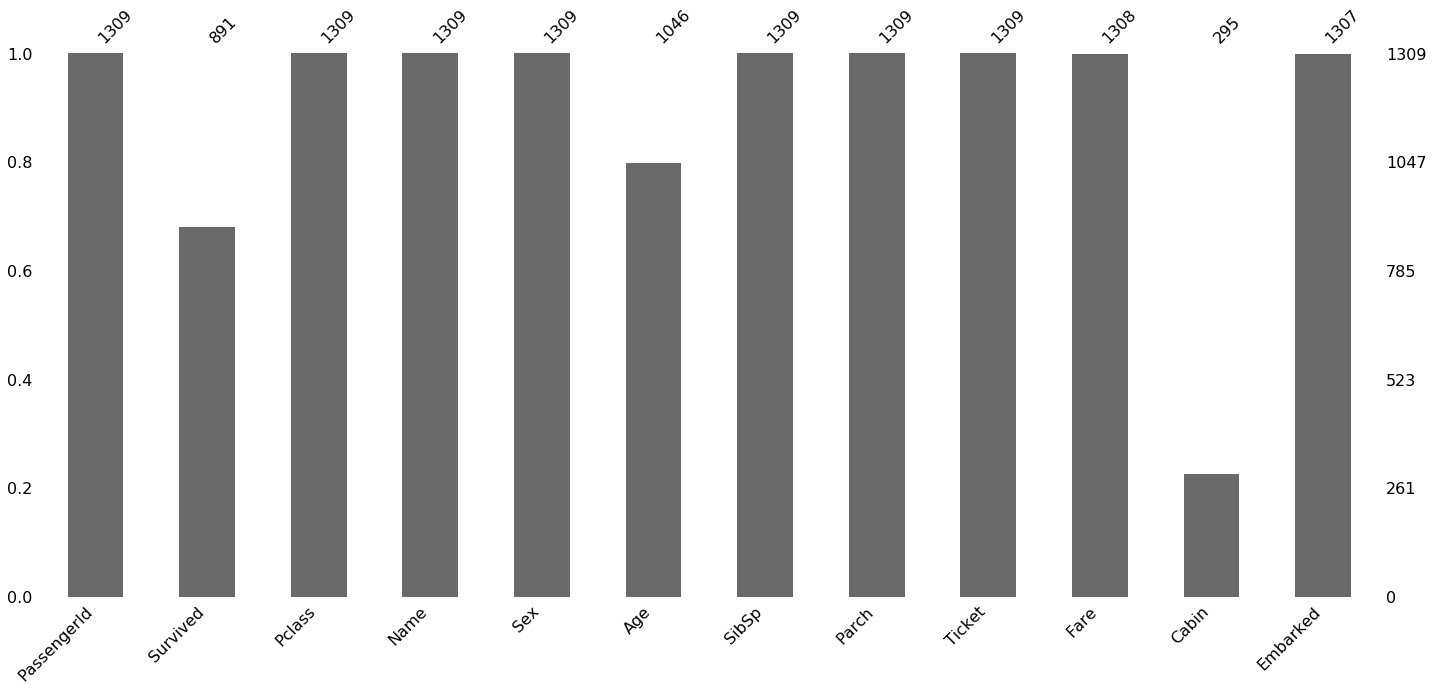

In [12]:
msno.bar(titanic)

In [13]:
# Count of missing variables
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- Survived column is showing missing values because test.csv file doesn't have Survived column.

- Age, Cabin, Fare and Embarked has missing values.

#### Imputing column "Cabin"

In [14]:
# Let's preview cabin again
titanic['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [15]:
# Let us again see the sum of missing values in feature "Cabin"
titanic['Cabin'].isnull().sum()

1014

In [16]:
# Let us understand the Cabin column
titanic['Cabin'].value_counts().head()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C78                4
Name: Cabin, dtype: int64

- Looks like column "Cabin" is alphanumeric with no special characters in it.
- It has also 1014 missing observations.
- We can presume that those NaN's didn't have a cabin.
- We will flag NaN as "X" and retain only the first character where cabin has alphanumeric values.

In [17]:
# Let's fill all NaNs of cabin as "X"
titanic["Cabin"].fillna(value = 'X', inplace=True)

In [18]:
# Keeping 1st character from the Cabin
titanic["Cabin"] = titanic["Cabin"].apply(lambda x : x[0])
titanic["Cabin"].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

#### Imputing columns "Embarked" , "Fare" and "Age"

In [19]:
# Imputing Embarked with mode because Embarked is a categorical variable
titanic["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Since, label "S" is most frequent we will be imputing missing values with it.

In [20]:
titanic["Embarked"].fillna(value = 'S', inplace=True)

In [21]:
# Imputing missing values of Fare. Fare is a numerical variable with outliers. Hence, it will be imputed
# median".
titanic["Fare"].fillna(value=titanic["Fare"].median(), inplace=True)

In [22]:
# Imputing missing values for column "Age".
titanic["Age"].fillna(value=titanic["Age"].median(), inplace=True)

In [23]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Thus, we see apart from target column "Survived" other features are imputed with missing values.

#### Categorizing features into "Numerical" and "Categorical" columns

In [24]:
cat_cols = []
for col in titanic.select_dtypes("object"):
    cat_cols.append(col)

In [25]:
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [26]:
num_cols = []
for col in titanic.select_dtypes(["int64","float64"]):
    if col != 'Survived':
        num_cols.append(col)

In [27]:
num_cols

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Class task

Convert categorical features to data type "category" and check the difference .

#### Finding out Oultiers

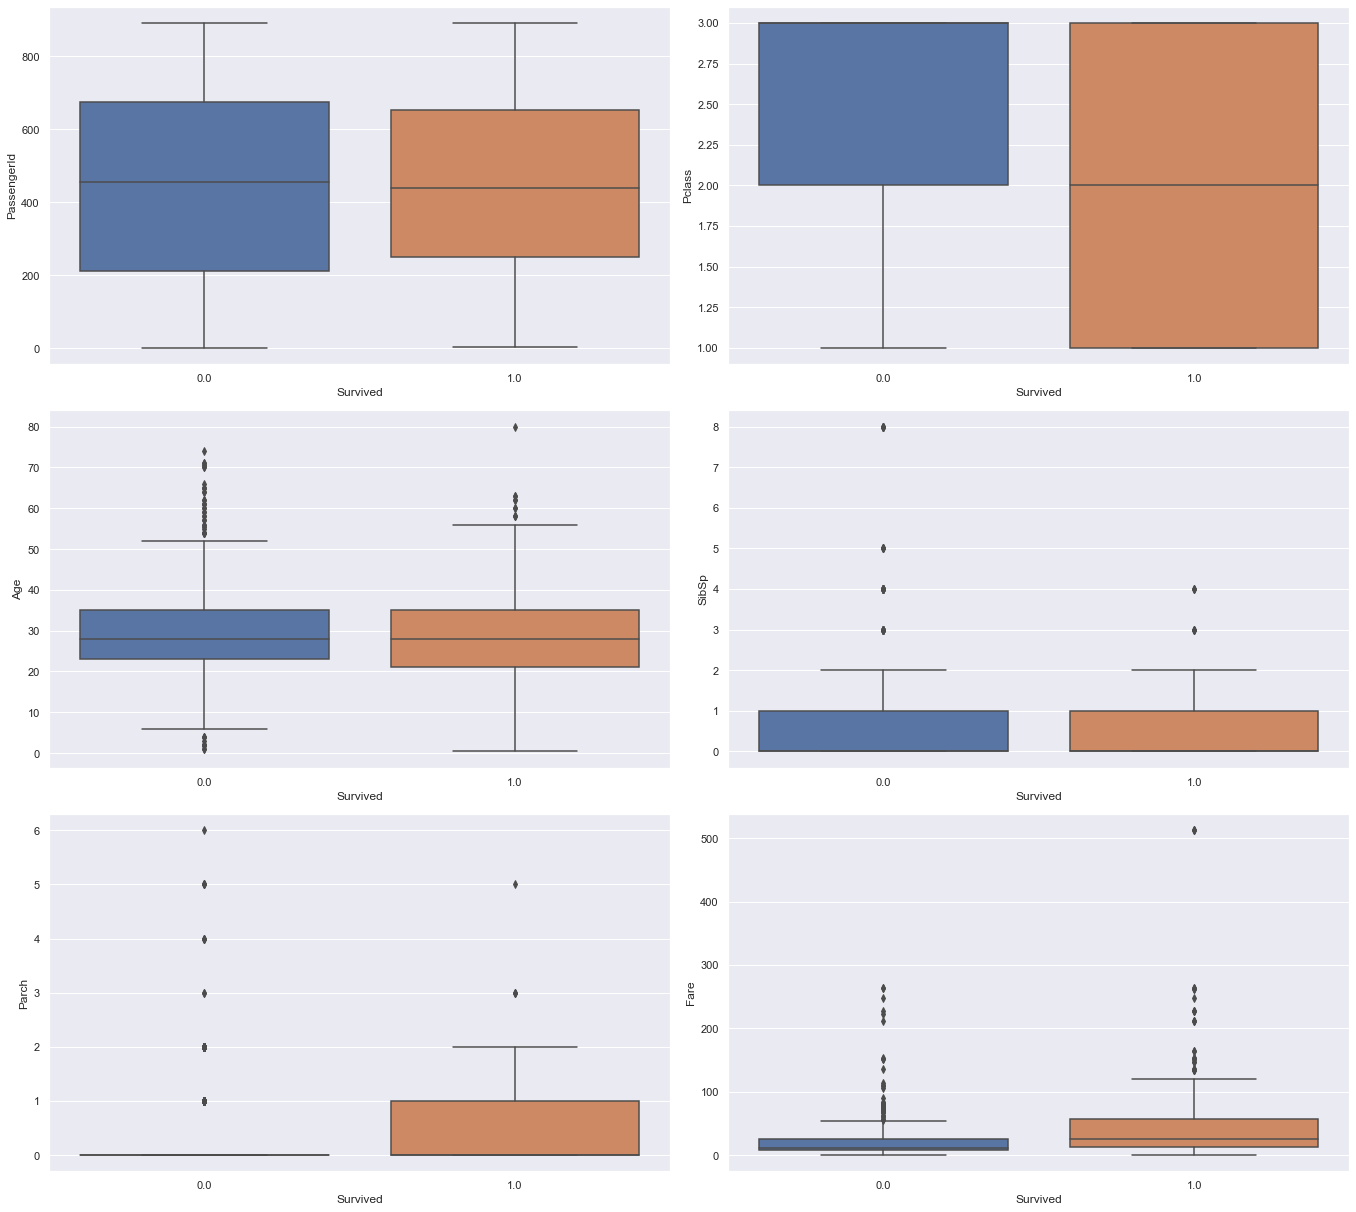

In [28]:
sns.set()
fig = plt.figure(figsize=(19,17))
i = 1
for col in titanic[num_cols]:
    plt.subplot(3,2,i)
    sns.boxplot(x=titanic['Survived'], y=titanic.loc[:,col])
    i=i+1
plt.tight_layout()
plt.show()

#### Class task


Try to figure out whether the points above IQR are really outliers.

### Univariate Analysis

<b> Analysing the target variable "Survived" </b>

In [29]:
titanic.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

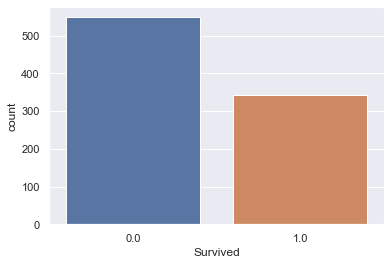

In [30]:
# Distribution of target variable "Survived"
sns.countplot(titanic["Survived"])
plt.show()

We can clearly observe the distribution across bar graph of counts of passengers who survived in the mishap.

#### Categorical Features

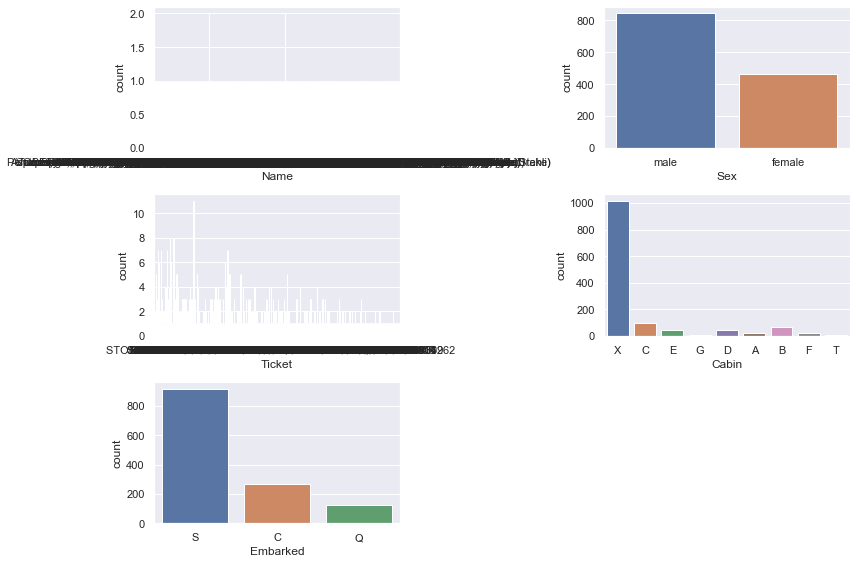

In [31]:
sns.set(rc={'figure.figsize':(12,8)})
i=1
for col in titanic.select_dtypes("object"):
    plt.subplot(3,2,i)
    sns.countplot(titanic[col])
    i = i + 1
    
        
    
plt.tight_layout()
plt.show()

### Class task

In [32]:
titanic.Ticket.value_counts()[:10]

CA. 2343        11
1601             8
CA 2144          8
347077           7
PC 17608         7
S.O.C. 14879     7
3101295          7
347082           7
382652           6
347088           6
Name: Ticket, dtype: int64

Try to apply same technique for column "Ticket" as used in feature "Cabin".

We see that columns "Name" is having many labels in it. Which is difficult to represent through a graph. Hence, we will analysing it using value_counts() function.

In [33]:
titanic.Name.value_counts()[:10]

Connolly, Miss. Kate                                 2
Kelly, Mr. James                                     2
del Carlo, Mr. Sebastiano                            1
Slabenoff, Mr. Petco                                 1
Petroff, Mr. Nedelio                                 1
Andersen, Mr. Albert Karvin                          1
Snyder, Mrs. John Pillsbury (Nelle Stevenson)        1
Thorneycroft, Mrs. Percival (Florence Kate White)    1
Futrelle, Mrs. Jacques Heath (Lily May Peel)         1
Willer, Mr. Aaron (Abi Weller")"                     1
Name: Name, dtype: int64

### Class task

Try to analyse the distribution of the above two columns "Name" and "Ticket".

#### Numerical Features

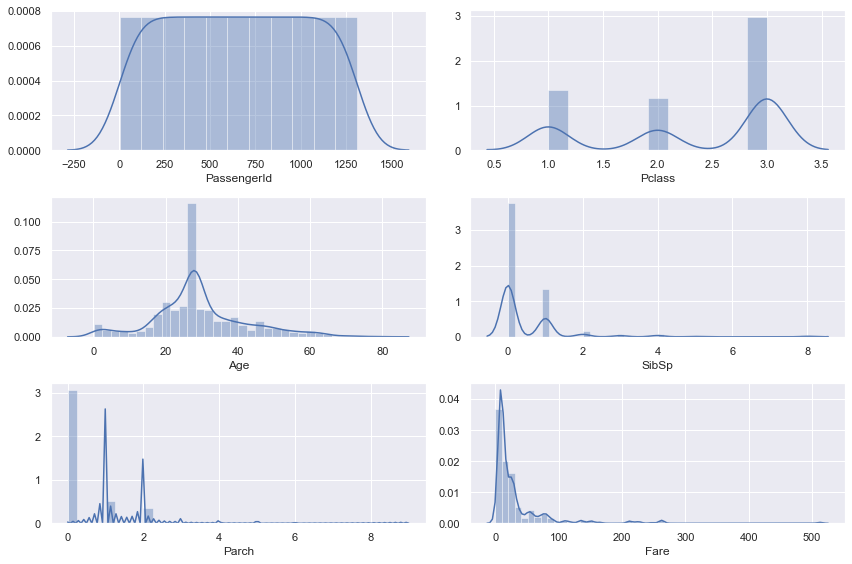

In [34]:
sns.set(rc={'figure.figsize':(12,8)})
i=1
for col in titanic[num_cols]:
    plt.subplot(3,2,i)
    sns.distplot(titanic[col])
    i = i + 1
    
        
    
plt.tight_layout()
plt.show()

### Class task

Are features "SibSp" , "Parch" and "Pclass" really numerical in nature? If yes , why are they numeric. If no, try to analyse the alternate solution.

### Bi-variate analysis

#### Relationship of Embarked with Survived

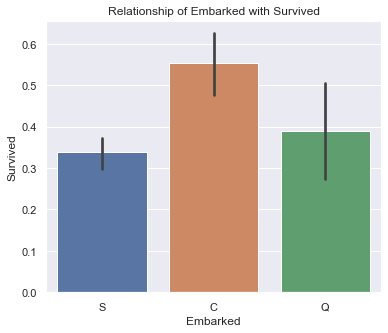

In [35]:
plt.figure(figsize=(6,5))
sns.barplot(x='Embarked',y='Survived', data=titanic[:891]);
plt.title("Relationship of Embarked with Survived")
plt.show()

Thus we see that passengers who embarked from "C" has more survival rate compared to the other two embarkments.

#### Relationship between Age and Survived

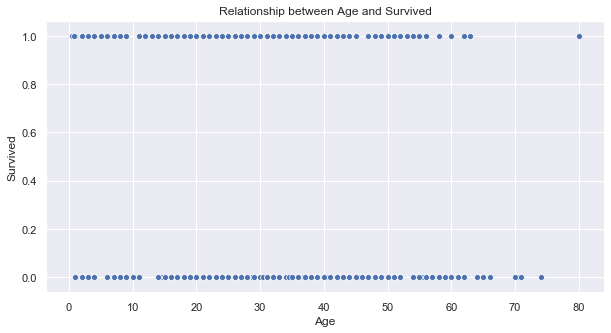

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Survived',data=titanic[:891]);
plt.title("Relationship between Age and Survived")
plt.show()

Through scatter plot we can see that passengers who are mostly infants and passengers of age group (10-45)

### Class task

Analyse more relationships among categorical and numerical features w.r.t target variable "Survived" and get insights from it.

In [37]:
titanic = titanic.drop(columns=['Name', 'PassengerId','Ticket'],axis=1)

#### Normalizing features

In [38]:
cont_features = []
for feature in titanic.select_dtypes(["int64","float64"]):
    if feature != 'Survived':
        cont_features.append(feature)

In [39]:
cont_features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [40]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
titanic[cont_features] = minmax.fit_transform(titanic[cont_features].values)

In [41]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,1.0,male,0.273456,0.125,0.0,0.014151,X,S
1,1.0,0.0,female,0.473882,0.125,0.0,0.139136,C,C
2,1.0,1.0,female,0.323563,0.000,0.0,0.015469,X,S
3,1.0,0.0,female,0.436302,0.125,0.0,0.103644,C,S
4,0.0,1.0,male,0.436302,0.000,0.0,0.015713,X,S


### Encoding Categorical Variables

In [42]:
titanic = pd.get_dummies(titanic, drop_first=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_Q,Embarked_S
0,0.0,1.0,0.273456,0.125,0.0,0.014151,1,0,0,0,0,0,0,0,1,0,1
1,1.0,0.0,0.473882,0.125,0.0,0.139136,0,0,1,0,0,0,0,0,0,0,0
2,1.0,1.0,0.323563,0.000,0.0,0.015469,0,0,0,0,0,0,0,0,1,0,1
3,1.0,0.0,0.436302,0.125,0.0,0.103644,0,0,1,0,0,0,0,0,0,0,1
4,0.0,1.0,0.436302,0.000,0.0,0.015713,1,0,0,0,0,0,0,0,1,0,1


### Model Building and Evaluation

In [43]:
# Let's split the train and test to feed machine learning algorithm
train = titanic.iloc[:891,:]
test = titanic.iloc[891:, :]

In [44]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.copy()

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy Score of Logistic Regression :",acc_log)

Accuracy Score of Logistic Regression : 81.14


#### Class task

1. Split the dataset randomly using train_test_split, K-Fold cross validation
2. Also, perform the hyperparameter tuning in the model for better results.

#### Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
conf_matrix = confusion_matrix(Y_train, Y_pred )

In [48]:
conf_matrix

array([[475,  74],
       [ 94, 248]], dtype=int64)

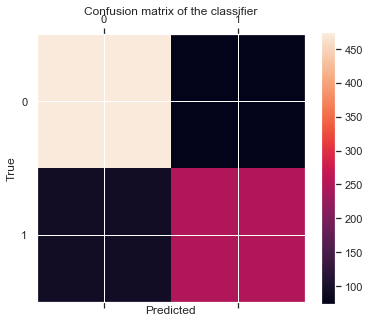

In [49]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()